<a href="https://colab.research.google.com/github/ark5mith/stable-diffusion-webui-colab/blob/community/ark5mith/RUN_ConfigDrive_Colab_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running WEBUI Public link only.

v1 Based on Camenduru GDrive Notebook 27/03/2023
https://github.com/camenduru/stable-diffusion-webui-colab/tree/drive

[README](https://github.com/ark5mith/stable-diffusion-webui-colab/blob/community/ark5mith/readme.md)

---



# AFTER modifying customization (install_path, output_path, config files, etc), hide all cells by clicking the triangle button image.png. Then click the one cell button available to run all. You can also use Runtime>Run all (CTRL+F9)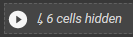

---

Please run the install/update on new push. Always make a copy to drive to prevent loss and for comparison.

Update 04/04/2023 from main branch 

Update 06/04/2023 install_path, easier model and extension download

Update 08/04/2023 update 2.1 WebUI from camenduru, extension png_info for discord image metadata.

---

[**LATEST RUN**](https://colab.research.google.com/github/ark5mith/stable-diffusion-webui-colab/blob/community/ark5mith/RUN_ConfigDrive_Colab_Kaggle.ipynb) | [**LATEST INSTALL**](https://colab.research.google.com/github/ark5mith/stable-diffusion-webui-colab/blob/community/ark5mith/INSTALL-UPDATE_ConfigDrive_Colab_Kaggle.ipynb) |
[*OLD v1.1 RUN*](https://colab.research.google.com/drive/1HGSyMkIi2aQzDgJe_68EelpV0W3wmuo_?usp=sharing) | [*OLD v1.1 INSTALL*](https://colab.research.google.com/drive/1mPw7WjKz16LTOpKCxFdLs_H5_CmPPiaJ?usp=sharing) |
[*OLD v1 RUN* (NO NGROK)](https://colab.research.google.com/drive/1BvOr-K5YS_YQ06A0wm0I21I47ohJlcCv?usp=sharing) | [*OLD v1 RUN* (WITH NGROK)](https://colab.research.google.com/drive/1oNBDLXGHt5s1YgMPfMT42aZvXKpDObTb?usp=sharing) | [*OLD v1 INSTALL*](https://colab.research.google.com/drive/16_bT6P2_MKH8DFLhCWP5KKB6PXdmmppQ?usp=sharing)

[**KAGGLE VERSION**](https://www.kaggle.com/code/roykent/stablediffusionwebui-configured/)


In [ ]:
# @title #**Configuration and Customization**
# mobile optimization require updates from https://github.com/viyiviyi/stable-diffusion-webui.git, unreliable
#mobileOptimize=True 
# install path on /content as default have more storage
# install path on /content/drive/(any folder name) have the ability for quick run
from google.colab import drive
drive.mount('/content/drive')
# @markdown ## **WEBUI Configuration**
# @markdown make sure you have same `install_path` with the INSTALL-UPDATE NOTEBOOK
install_path="/content/drive/Shareddrives/COLAB0" # @param {type:"string"}
# Output path on 
output_path="/content/drive/Shareddrives/OUTPUT/" # @param {type:"string"}
# original webui_setting https://github.com/2575044704/sd-configs4.git 
# @markdown ## **UI Setting and Styles**
#@markdown enable `update_config` to replace WebUI config in google drive with github provided link. It will backup the old config and rename folder with current date.
update_config = True  # @param {type:"boolean"}
webui_settings = 'https://github.com/ark5mith/sd-configs' # @param {type:"string"}
#setting_file = '/content/drive/Shareddrives/COLAB0/configs/config.json' # @param {type:"string"} #disabled
#ui_config_file = '/content/drive/Shareddrives/COLAB0/configs/ui-config.json'# @param {type:"string"} #disabled
# @markdown &nbsp;
# @markdown ## **WEBUI [Arguments](https://github.com/AUTOMATIC1111/stable-diffusion-webui/wiki/Command-Line-Arguments-and-Settings)**
clip_path = "--clip-models-path /content/drive/Shareddrives/COLAB0/stable-diffusion-webui/models/CLIP " # @param {type:"string"}

no_half = False  # @param {type:"boolean"}
no_half_vae = True # @param {type:"boolean"}
allow_code = True # @param {type:"boolean"}
no_progressbar_hiding = False  # @param {type:"boolean"}
medvram = False  # @param {type:"boolean"}
lowvram = False  # @param {type:"boolean"}
deepdanbooru = True # @param {type:"boolean"}
xformers = True  # @param {type:"boolean"}
disable_opt_split_attention = False  # @param {type:"boolean"}
skip_torch_cuda_test = True # @param {type:"boolean"}

run_string_with_variables = {

    "--no-half": f"{no_half}",
    "--no-half-vae": f"{no_half_vae}",
    "--allow-code": f"{allow_code}",
    "--no-progressbar-hiding": f"{no_progressbar_hiding}",
    "--medvram": f"{medvram}",
    "--lowvram": f"{lowvram}",
    "--deepdanbooru": f"{deepdanbooru}",
    "--xformers": f"{xformers}",
    "--disable-opt-split-attention": f"{disable_opt_split_attention}",
    "--skip-torch-cuda-test": f"{skip_torch_cuda_test}"
}

custom_arguments = "--theme dark --api " # @param {type:"string"}
#@markdown `--listen --xformers --enable-insecure-extension-access  --gradio-queue --ckpt-dir /content/fused --multiple` enabled by default, you can edit in in the editor `camenfixed` .
camenfixed = "--listen --xformers --enable-insecure-extension-access  --gradio-queue --ckpt-dir /content/fused --multiple"
# @markdown &nbsp;
#@markdown ## **ngrok** setting, [get authkey here](https://dashboard.ngrok.com/get-started/your-authtoken)
useNgrok=True # @param {type:"boolean"}
ngrokTokenFile='/content/drive/Shareddrives/COLAB0/configs/ngrok_token.txt' # @param {type:"string"}# 非必填 存放ngrokToken的文件的路径
ngrokToken='' # @param {type:"string"}
# @markdown ##**enable gradio public link**
share_link = True # @param {type:"boolean"} 
# @markdown &nbsp;
# @markdown ## **Enable password authentication**  
# @markdown *(Locked WEBUI)* 

# @markdown &nbsp;
# @markdown You may wish to put an authentication page in front of your app to limit who can open your app. With the auth= keyword argument in the launch() method, [you can provide a tuple with a username and password](https://gradio.app/sharing-your-app/#authentication)
# @markdown &nbsp;

# @markdown **enable authentication (work in tunnel link)**
use_gradio_auth = True # @param {type:"boolean"}
# @markdown use anything, not dependant on your account. here example using ```username``` as username and ```password``` as password 
gradio_auth_username = "username" # @param {type:"string"}
gradio_auth_password = "password" # @param {type:"string"}

# @markdown &nbsp;
#@markdown ##### FRPC *(disable if unknown)*
useFrpc=False # @param {type:"boolean"}
frpcConfigFile='/content/drive/Shareddrives/COLAB0/configs/frpc.ini' # @param {type:"string"}   # optional frp configuration file

from pathlib import Path
%cd /content
%env PYTHONDONTWRITEBYTECODE=1
import os
from google.colab.output import eval_js
os.environ['colab_url'] = eval_js("google.colab.kernel.proxyPort(7860, {'cache': false})")
import time
import re
if not Path(frpcConfigFile).exists(): useFrpc = False

advanced_options = {k for (k, v) in run_string_with_variables.items() if v == "True"}
vars = " ".join(advanced_options)
if share_link:
    vars += " --share"
if use_gradio_auth:
    vars += f" --gradio-auth {gradio_auth_username}:{gradio_auth_password}"

linkHypernetworksDir=False # Link the hypernetworks directory to the output directory. It is recommended to enable it if you need to train hypernetworks
linkEmbeddingsDir=False # Link the embeddings directory to the output directory. It is recommended to enable it if you need to train embeddings
linkTextual_inversionDir=False # Link the textual_inversion directory to the output directory. It is recommended to enable it if you need to save the output files of the training process.

os.environ['install_path'] = install_path
os.environ['output_path'] = output_path
os.environ['webui_settings'] = webui_settings
os.environ['frpcConfig'] = frpcConfigFile
os.environ['COMMANDLINE_ARGS'] = f"{vars} {clip_path} {custom_arguments} {camenfixed}"

if Path(ngrokTokenFile).exists():
    with open(ngrokTokenFile,encoding = "utf-8") as nkfile:
        ngrokToken = nkfile.readline()
#@markdown expected result look like this ```Mounted at /content/drive``` or```Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).``` ```/content``` ```env: PYTHONDONTWRITEBYTECODE=1```

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
env: PYTHONDONTWRITEBYTECODE=1


In [ ]:
#@title # **Storing Definition**
#@markdown Leave as it is. If it doesn't show anything but ✔ , then it is done. 
def pathIsFile(path):
    if Path(path).is_file():
        return True
    if re.search(r'\.(ckpt|safetensors|png|jpg|txt|pt|pth|json|yaml|\*)$',path):
        return True
    return False

def link_dir():
    # Link output directory Because sd is deployed in the stable-diffusion-webui directory, 
    # only the outputs directory is placed in the output_path/ directory for easy download after running
    !mkdir -p $output_path/outputs
    !rm -rf $install_path/stable-diffusion-webui/outputs
    !ln -s -r $output_path/outputs $install_path/stable-diffusion-webui/ # 输出目录
    !mkdir -p $output_path/log
    !rm -rf $install_path/stable-diffusion-webui/log
    !ln -s -r $output_path/log $install_path/stable-diffusion-webui/
    # Link the hypernetworks directory
    if linkHypernetworksDir:
        !rm -rf $install_path/stable-diffusion-webui/models/hypernetworks
        !mkdir -p $output_path/hypernetworks
        !ln -s -r $output_path/hypernetworks $install_path/stable-diffusion-webui/models/
    # Link the embeddings directory
    if linkEmbeddingsDir:
        !rm -rf $install_path/stable-diffusion-webui/embeddings
        !mkdir -p $output_path/embeddings
        !ln -s -r $output_path/embeddings $install_path/stable-diffusion-webui/
    # Linking the training output directory folder link will cause the function to be unavailable
    if linkTextual_inversionDir:
        !rm -rf $install_path/stable-diffusion-webui/textual_inversion
        !mkdir -p $output_path/textual_inversion/
        !ln -s -r $output_path/textual_inversion $install_path/stable-diffusion-webui/
        
def use_config():
    %cd $install_path/stable-diffusion-webui
    !mkdir -p tmp
    %cd tmp
    if update_config:
          print('updating config from github')
          import os
          from datetime import date
          # Specify the folder path that you want to rename
          old_config = os.path.join(install_path, 'stable-diffusion-webui', 'tmp', 'sd-configs')
          # Get the current date
          today = date.today().strftime("%Y-%m-%d")
          # Create the new folder name with the current date
          new_config = "sd-configs " + today
          # Rename the folder to the new name
          os.rename(old_config, new_config)
          !git clone $webui_settings sd-configs
          !cp -rf sd-configs/dist/* $install_path/stable-diffusion-webui
          print('config downloaded')

    else: 
          print('config will not be changed. Check update_config to replace with config from github repo')

def ngrok_start():
    if useNgrok == True and ngrokToken != '':
        print('use nrgok')
        !pip install pyngrok
        from pyngrok import conf, ngrok
        conf.get_default().auth_token = ngrokToken
        conf.get_default().monitor_thread = False
        ssh_tunnels = ngrok.get_tunnels(conf.get_default())
        if len(ssh_tunnels) == 0:
            ssh_tunnel = ngrok.connect(7860)
            print('address：'+ssh_tunnel.public_url)
        else:
            print('address：'+ssh_tunnels[0].public_url)
    else:
        print('skip start ngrok. Disabled or Token not found')
        
def installFrpc():
    !apt -y update -qq
    !apt -y install -qq aria2
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/datasets/ACCA225/Frp/resolve/main/frpc -d  $install_path/stable-diffusion-webui/ -o frpc
    %cd  /content/drive/Shareddrives/COLAB
    !mkdir -p frpc
    %cd frpc
    !cp -f -n $install_path/stable-diffusion-webui/frpc ./frpc
    !chmod +x ./frpc
    !./frpc -v 

def startFrpc():
    if useFrpc:
        !pm2 del frpc_webui
        !pm2 start  $install_path/frpc/frpc -n frpc_webui -- -c $frpcConfig    

def start():
    %cd $install_path/stable-diffusion-webui
    !python launch.py 
     
def main():
    installFrpc()
    ngrok_start()
    startFrpc()
    use_config()
    link_dir()
    start()
   

In [ ]:
#@title #**Installing Dependencies**
# @markdown expected result
# @markdown ```Status Legend:```
# @markdown ```(OK):download completed.```
%cd /content
import os
from google.colab.output import eval_js
os.environ['colab_url'] = eval_js("google.colab.kernel.proxyPort(7860, {'cache': false})")

%env PYTHONDONTWRITEBYTECODE=1
%env TF_CPP_MIN_LOG_LEVEL=1

!apt -y update -qq
!wget http://launchpadlibrarian.net/367274644/libgoogle-perftools-dev_2.5-2.2ubuntu3_amd64.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/google-perftools_2.5-2.2ubuntu3_all.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/libtcmalloc-minimal4_2.5-2.2ubuntu3_amd64.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/libgoogle-perftools4_2.5-2.2ubuntu3_amd64.deb
!apt install -qq libunwind8-dev
!dpkg -i *.deb
%env LD_PRELOAD=libtcmalloc.so
!rm *.deb

!apt -y install -qq aria2
!apt -y install -qq unionfs-fuse
!pip install torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1 --extra-index-url https://download.pytorch.org/whl/cu116 -U
!pip install -q xformers==0.0.16 triton==2.0.0 -U

!mkdir /content/fused
!mkdir /content/models
!unionfs-fuse $install_path/stable-diffusion-webui/models/Stable-diffusion=RW:/content/models=RW /content/fused

%cd $install_path/stable-diffusion-webui

!git reset --hard

!git -C $install_path/stable-diffusion-webui/extensions/sd-webui-tunnels reset --hard
!git -C $install_path/stable-diffusion-webui/extensions/sd-webui-tunnels pull


os.system(f"""sed -i -e '/    prepare_environment()/a\    os.system(f¥"sed -i -e 's/dict()))/dict())).cuda()/g' {install_path}/stable-diffusion-webui/repositories/stable-diffusion-stability-ai/ldm/util.py"¥)\' {install_path}/stable-diffusion-webui/launch.py""")
os.system(f"""sed -i -e 's/checkout {{commithash}}/checkout --force {{commithash}}/g' {install_path}/stable-diffusion-webui/launch.py""")
os.system(f"""sed -i -e 's/fastapi==0.90.1/fastapi==0.89.1/g' {install_path}/stable-diffusion-webui/requirements_versions.txt""")

!mkdir $install_path/stable-diffusion-webui/extensions/deforum-for-automatic1111-webui/models

clippath = "stable-diffusion-webui/models/CLIP" 
clipdir = os.path.join(install_path, clippath)
  
if not os.path.exists(clipdir):
       os.mkdir(clipdir)
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://openaipublic.azureedge.net/clip/models/b8cca3fd41ae0c99ba7e8951adf17d267cdb84cd88be6f7c2e0eca1737a03836/ViT-L-14.pt -d $install_path/stable-diffusion-webui/models/CLIP -o ViT-L-14.pt

/content
env: PYTHONDONTWRITEBYTECODE=1
env: TF_CPP_MIN_LOG_LEVEL=1
28 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2023-04-08 15:57:27--  http://launchpadlibrarian.net/367274644/libgoogle-perftools-dev_2.5-2.2ubuntu3_amd64.deb
Resolving launchpadlibrarian.net (launchpadlibrarian.net)... 185.125.189.228, 185.125.189.229, 2620:2d:4000:1001::8008, ...
Connecting to launchpadlibrarian.net (launchpadlibrarian.net)|185.125.189.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203696 (199K) [application/x-debian-package]
Saving to: ‘libgoogle-perftools-dev_2.5-2.2ubuntu3_amd64.deb’

libgoogle-perftools 100%[===================>] 198.92K   502KB/s    in 0.4s    

2023-04-08 15:57:28 (502 KB/s) - ‘libgoogle-perftools-dev_2.5-2.2ubuntu3_amd64.deb’ saved [203696/203696]

--2023-04-08 15:57:28--  https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/google-perftools_2.5-2.2ubuntu3_all.deb
Resolving launchpad.

In [ ]:
# @title #**Run** 
# @markdown `Could not find TensorRT` loading is long but don't worry, as long as the cell doesn't stop, it still running. 
#WEBUI MAIN CELL
print('Loading WEBUI. Wait until "Public WebUI Colab <service name> URL: xxx.remote.moe or xxx.trycloudflare.com" are given')
print('Ngrok link given after Sucessfully installed pyngrok-5.2.1 adress: http://xxxx-xxx.ngrok.io Do not launch before other link ready',)
main()
print('WEBUI stopped. Re run this cell for restart.')

Loading WEBUI. Wait until "Public WebUI Colab <service name> URL: xxx.remote.moe or xxx.trycloudflare.com" are given
Ngrok link given after Sucessfully installed pyngrok-5.2.1 adress: http://xxxx-xxx.ngrok.io Do not launch before other link ready
28 packages can be upgraded. Run 'apt list --upgradable' to see them.
aria2 is already the newest version (1.35.0-1build1).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
a53a88|OK  |       0B/s|/content/drive/Shareddrives/COLAB0/stable-diffusion-webui//frpc

Status Legend:
(OK):download completed.
/content/drive/Shareddrives/COLAB
/content/drive/Shareddrives/COLAB/frpc
0.45.0-sakura-2.3
use nrgok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
address：https://b6fa-34-72-103-61.ngrok-free.app
/content/drive/Shareddrives/COLAB0/stable-diffusion-web

Ngrok Guide


1.   register in ngrok.com, then copy your Authtoken in https://dashboard.ngrok.com/get-started/your-authtoken to `ngrokToken='yourtoken'`
for example `ngrokToken='akwofao8y9yw9fyoaw9naof_7oya78eyfbaey'`
2.   for secrecy you can use ngrokTokenFile='yourfilepath/filename.txt'
example ngrokTokenFile='/content/drive/Shareddrives/COLAB/configs/ngrok_token.txt'
inside the text file, you just need to put one line yourtoken like `akwofao8y9yw9fyoaw9naof_7oya78eyfbaey`
3.   The ngrok process errored on start: The authtoken you specified does not look like a proper ngrok tunnel authtoken
this mean you haven't changed the ngrokToken or the token is invalid (not copied fromhttps://dashboard.ngrok.com/get-started/your-authtoken)

leave it empty  `ngrokToken=''` like that if not used 









Big thanks to Camenduru 💌 and all Contributor/Collaborator for always up to date and reliable colab.

Thanks to [ChatGPT](https://chat.openai.com/chat) for providing 24/7 assistance. You can look how dependent i'm in [using ChatGPT](https://sharegpt.com/c/Z8KX0c4). 

Special thanks ✌ [ddPn08](https://github.com/ddpn08/) and [viyiviyi](https://github.com/viyiviyi) for their inspiring notebook.